Pre Read:
- DateTime numpy
- Datetime pandas
- pvalue statistics


Post Read
- Resamling
- Performance metrics for forecasting




## Content

> **Note:**
- In the time series lectures we will be using `Statsmodels` library for all the models. This library gets frequent updates so learners should be careful while using it.

## Problem statement

#### Imagine you are a Data Scientist at MobiPlus, a mobile manufacturing company

You need to forecast their future sales for better planning and revenue.

- **Agenda 1:** We want to understand the patterns in demand to be able to be better plan for factory maintenance / staffing requirements.
- **Agenda 2:** We need a certain level of accuracy. The management requires that  the Mean Absolute Percentage Error (MAPE) is not more than 5%.
- **Agenda 3:** Need a range forecast to supplement the point forecast to make educated trade-off wherever needed.

Over the next few lectures, we will be completing these tasks.



<br>

> **Q. Why is forecasting the sales volume important for MobiPlus?**

This forecast would help MobiPlus in planning its operations efficiently.

- Having an idea of what future sales value would look like, helps the company plan it's production better. There is no point in **over producing or under producing** the products.

- Also, in peak seasons, the company might want to offer deals to **promote the sale** of their brand.

- Hiring / purchasing / discounting / marketing / maintainance, etc including some other financial or strategy decisions depend very highly on forecasts.


<br>

> **Q. What would be the effect of an over-forecast?**

An over forecast of the value can
- lead to huge piling up of smart phones in the warehouse.
- This will cause an increase in inventory holding cost.
- Also, 30% of the phones would need to be scrapped as these phones have become outdated in the evolving smart phone industry.

<br>

> **Q. What would be the effect of an under-forecast?**

An under forecast can lead to
- lot of unmet demand,
- leading to a poor revenue creation, and
- loss of goodwill amongst its loyal customers.




#### Let's see what our data looks like

You are given a dataset consisting of historical sales corresponding to its respective months.

![picture](https://drive.google.com/uc?export=view&id=179Y0AoR6jKBF5CEsAxqr0JAcCuf0rN8L)


So, here we are given the sales data of a mobile company based on which we have to forecast their **future sales**.

> **Q. Which category does this dataset fall under?**

This kind of data falls under the **time series** category.

<br>

#### **Q. What is time series data?**
A **signal**, indexed by an **ordered timestamp** is a timeseries data.

For it to be a time series, you need minimum two things
- Date / timestamp (denoted t)
- One quantity (denoted y)

Here, t can be in days, weeks, months, years, or even in seconds.

<br>

Data observations like sales, revenues, inventories etc are most commonly expressed as a time series.

Below are some examples of time series data:
1. Stocks data (NIFTY)
 - Here, y is the stock prices
 - t is indexed in days, giving us daily stock data

2. Population Growth Rate for a country
 - Here, y gives the growth rate
 - t is indexed yearly

3. Container Port Traffic
 - Again, y gives the port traffic
 - t is indexed yearly

4. GDP Growth Rate
 - Here, y denotes the GDP for the quater
 - Quaterly series, hence t is indexed in quater years (3 months)


![picture](https://drive.google.com/uc?export=view&id=1af8S1hhoFQkhOmOWN_u2VbhKwD01Wcqw)

#### Q. What is forecasting?
As the name suggests, forecasting is the process of analyzing historic data to predict future values.

Forecasting is also a **supervised learning** problem

Here, we try to predict **real valued numbers**.

Hence, naturally it is **more similar to regression** in approach, than classification.

- Given the historic values of a feature x till the present time t: $x_1, x_2, ..., x_t$

- We need to predict the value of this feature for future: $x_{t+1}, x_{t+2}, ...$

![picture](https://drive.google.com/uc?export=view&id=1KQ4450FcESSrjTdcEXJKoXF8BNMPiPPM)

<br>

> **Q. How is forecasting different from other families of problems (like regression, classification)?**

In regression/classification problems,
- We have had some inputs (independant variables),
- By using them, we've been predicting for an output (dependent variable).
- By doing so, we've been trying to find a relationship between the two.

In forecasting, Unlike regresion, we do not have a set of inputs and one output.

Rather, we have a **signal**.

And we are looking at some past values to predict some future value.

 <br>

> **Q. What is a signal?**

**A signal is just a series of numbers ordered by time at which they were recorded representing the same physical quantity.**


Let's start with simple data pre-processing and then start the time series analysis
* First let's import the required libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [42]:
plt.rcParams['figure.figsize'] = (20, 6)  # Again because some issue with google colab

Let's load the data now.

In [43]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 36.0MB/s]


In [82]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [62]:
mobile_sales.DATE.isna().sum()

0

In [59]:
mobile_sales

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
...,...,...
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0


Notice that the **frequency** of data is **Monthly**

> **Q. What is the data type of variables in our dataset?**

We can check the data types in the dataset by using **dtypes** operator

In [46]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

Notice the dtype of DATE column: **numpy datetime64**


> **Q. Is it essential to have the time column with datetime type?**

**Yes.**

There are a lot of built in functions and methods in pandas that we can use with the type datetime, to ease our task.

Since we loaded our data from an excel file, we automatically got DATE dtype as datetime.

Had we been using a csv file, we would've had to **explicitly convert** the DATE column to datetime type as csv format stores it as a string

This would've been done as:-

```python
pd.to_datetime("column_name")
```
If the column is in string type instead, we would only be adding more task for ourselves.

<br>

Now let's see some information about the sales column

In [47]:
mobile_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

You can see the information such as mean, standard deviation, min, max values and quartile values

Let's see more information about the date column

In [48]:
mobile_sales.DATE.describe()

<ipython-input-48-43749c50e8e9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.DATE.describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [49]:
mobile_sales.Sales.isna().sum()

19

So, we can see that we have sales data of MobiPlus starting from 1st Jan 2001, uptil 1st Jan 2019. i.e. we have sales data of 18 years!

<br>

> **Q. How many entries should we have in our dataset?**

- We have 18 years worth of data,
- Our data is indexed monthly.
- So we should have 18*12 + 1 (1 month for the year 2019) entries in our dataset.


![picture](https://drive.google.com/uc?export=view&id=1vJbLP9hA5H3BuophH5prgnUnQ74tYvC-)

In [ ]:
18*12 + 1

217

In [ ]:
len(mobile_sales.DATE.unique())

217

This aligns with the count we got for our DATE column.

<br>

> **Q. What if this check had revealed inconsistency?**

Had this value not been equal to the number of unique entries in the DATE column, it would've meant that we have **missing months** in the data, and we would've had to fix this.

For example,
- If for the year 2010, we have data for February and then directly for May.
- This means We are missing data for 2 months in between (march and april).
- But the model is not aware of this, so it will learn wrong.

Hence, we must do this check.

<br>

Lets take a look at the index for our dataset.


In [50]:
mobile_sales.index

RangeIndex(start=0, stop=217, step=1)

In [51]:
mobile_sales.index[-1]

216

In [56]:
mobile_sales.index[0]

0

As you can see, we 0, 1, 2, 3, ... as our indexes for the dataset.

> **Q. Can we use dates as the index ?**

**Yes.**

All the dates would be **unique**.

Also, Since datetime column is actually a **numeric** column, we can set it as the index for our data.

<br>

> **Q. What is the advantage of setting datetime column as the index?**

- We have great functionality in pandas for datetime dtype, that we can use to ease our tasks.
- Makes the plotting of data easier.


In [83]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


---

## Do you see any challenges before we begin?
Now, let's plot the graph for the sales data

<Axes: xlabel='DATE'>

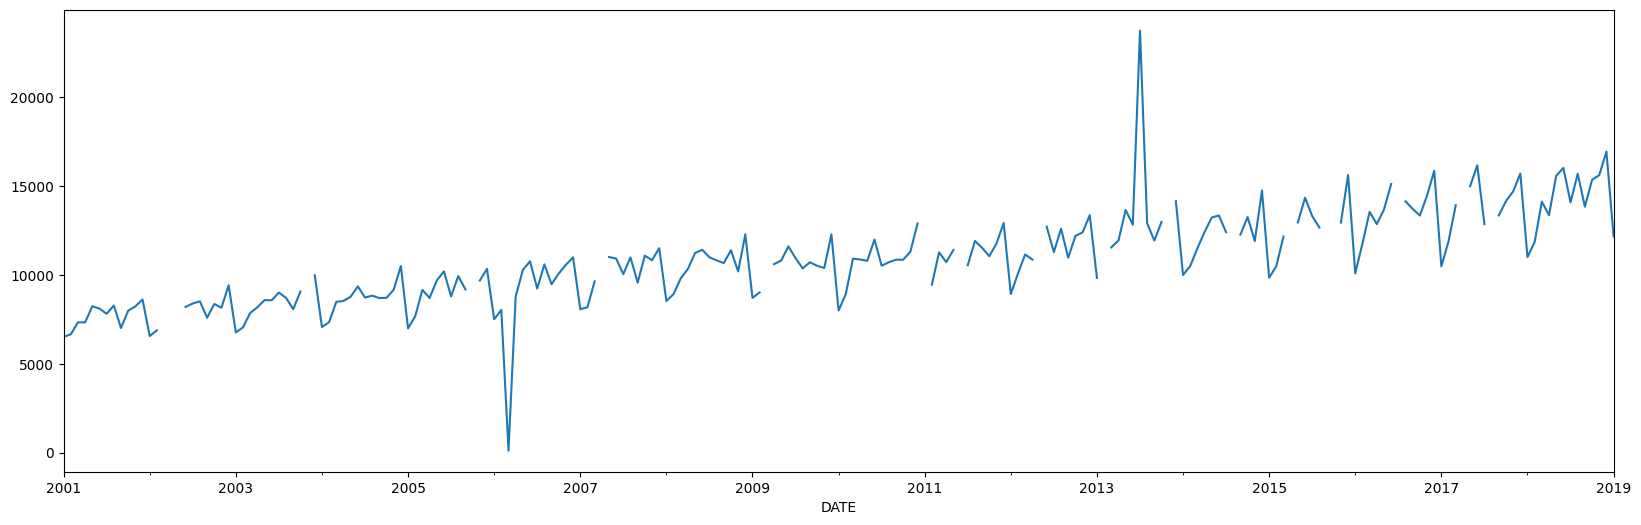

In [65]:
mobile_sales.Sales.plot()

#### Q. Plotting Sales Data

Expected Answers:
- **Missing values**
- **Anomalies**

Let's take a look at how to go about solving these.

---

## Challenge 1: Handling missing values

So, as you can see, this is a plot that shows the monthly sales data.

Notice that there are some **missing values** in the data.





#### **Quiz-1:**

```
If the data contains only 3% of the missing values, dropping them is a good way of handling the missing data in a time series model.
Is the statement True or False?

a. True
b. False

```
Answer: b - Time series data is sequential and cannot be just "dropped".



We need to
- Find where the values are missing
- Analyze if there is any pattern
- Fill them with the most appropriate value.

<br>

> **Q. How do we find the missing values?**

By now, we already know how to find missing values. We use the `isna()` method to get a sense of how many values are missing.

In [66]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

Let's try to see if there is any pattern in these 19 missing entries.

In [67]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


There is no visible pattern.

So we can safely move forward, but if there was a pattern we would have handled that differently.

<br>

> **INTERACTION**
> - Can you suggest some ways to fill missing values? (mean, median, 0, etc)

<br>

### Imputing with Mean/Median
#### Q. How can we go about imputing the missing values?
One basic intuition is to fill these missing values with the **mean** or the **median** of the signal.

Let's look at both these values, and try filling up the missing values with them.

In [68]:
mobile_sales.Sales.mean()

10842.757575757576

In [69]:
mobile_sales.Sales.median()

10745.0

As you can see, both these values are similar, so we can safely assume that using either of these values to fill up the missing values would fetch similar results.

Let's try replacing missing values with the mean in this example and let's plot the same

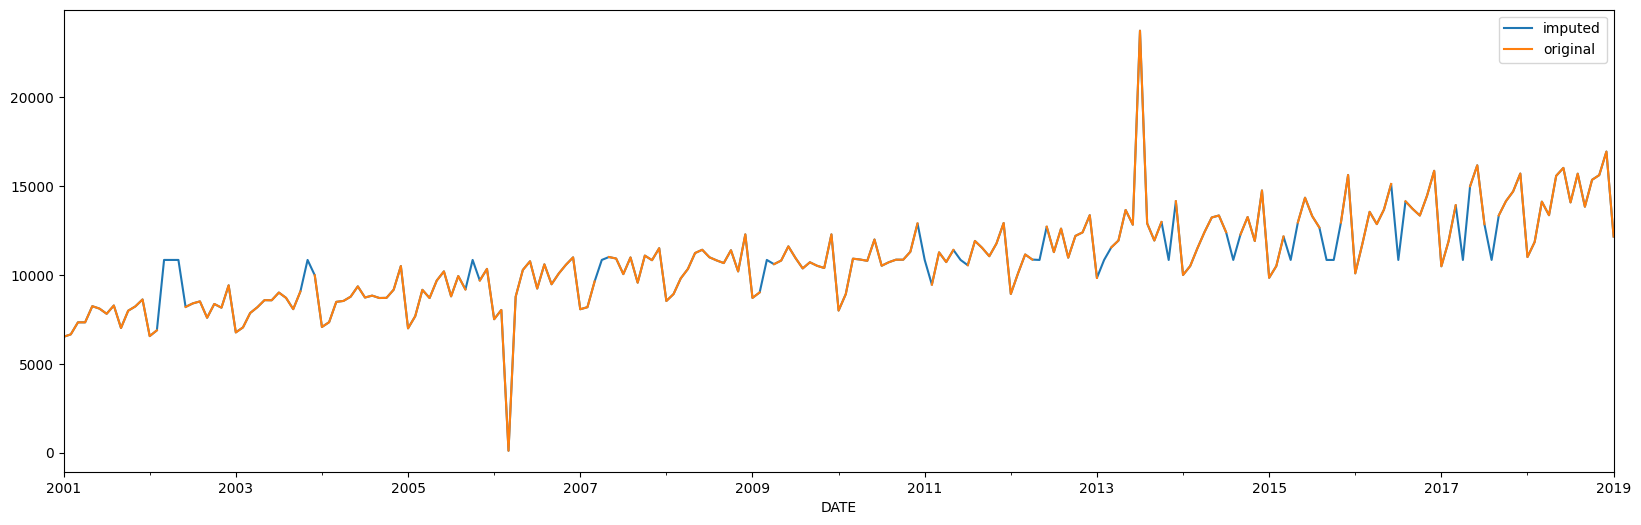

In [84]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()




> **Q. Looking at the plot above, Do you think the values got imputed correctly?**

**No.**

Look at the plot for the year 2002
- The sales was in the range of 6,000-7,000
- We imputed the missing values with **mean of the entire data** across 18 years, i.e. 10k approx
- You can see how sharply this spike increases, in the plot to accomodate the same.
- Also notice that when the missing values gap ends, the value is in the range of roughly 8,000
- This again, causes a sharp decrease in the plot
- This doesn't feel right, and honestly a little forced.
- Certainly, the sales volume doesn't immediately increase to 10k for the months with missing data and then come back to a smaller scale, right as we get the original data.

This seems to be a **pattern for the early years** of data (2003, 2005)

![picture](https://drive.google.com/uc?export=view&id=1MOMa8PCPMEWrIqjjgc2a_CGe3gGaFKfm)


For year in the middle, 2007 to mid-2013, this imputation made sense.
- The sales have increased in scale now
- A sales value of 10k now doesn't seem like an anomaly.
- The plot seems to be smooth, and not forced.
- This makes sense, because we took mean of the entire time series, so it is expected to be somewhere in the center of the time series.

In the later years, from mid-2013, there seems to be another pattern
- Now, the imputations seem to be forced again.
- This time, it seems we're under estimating the sales.
- There is a sharp increase and decrease to incorporate our imputations.

<br>

**NOTE:** As stated above, even though we're looking at replacing missing values with mean, replacing with median would've also given the same result, as they have a similar value.

<br>


#### **Quiz-2:**
```
Why is using mean values of the data not optimal for filling the missing values?
a. The filled value may be different from local neighbours.
b. As the time series has dates, it's not possible to find mean.
c. Mean values will work fine even incase of missing data in time series.
```
Answer: a

### Imputing with 0

> **Q. What if we impute by replacing the missing values with 0?**

**That doesn't make sense for this time series.**

The monthly sales of a mobile phone would not just drop to 0 on random months.

**But in many cases, this works very well.**

A lot of times, time series can be at a daily level, and it can happen that the sales for particular days is 0, owing to the store being closed on public holidays, or Sundays.

In industry, in order to do that, we need to first check in with the client who owns that data, to cross-check first without making assumptions.

This is very common practice.


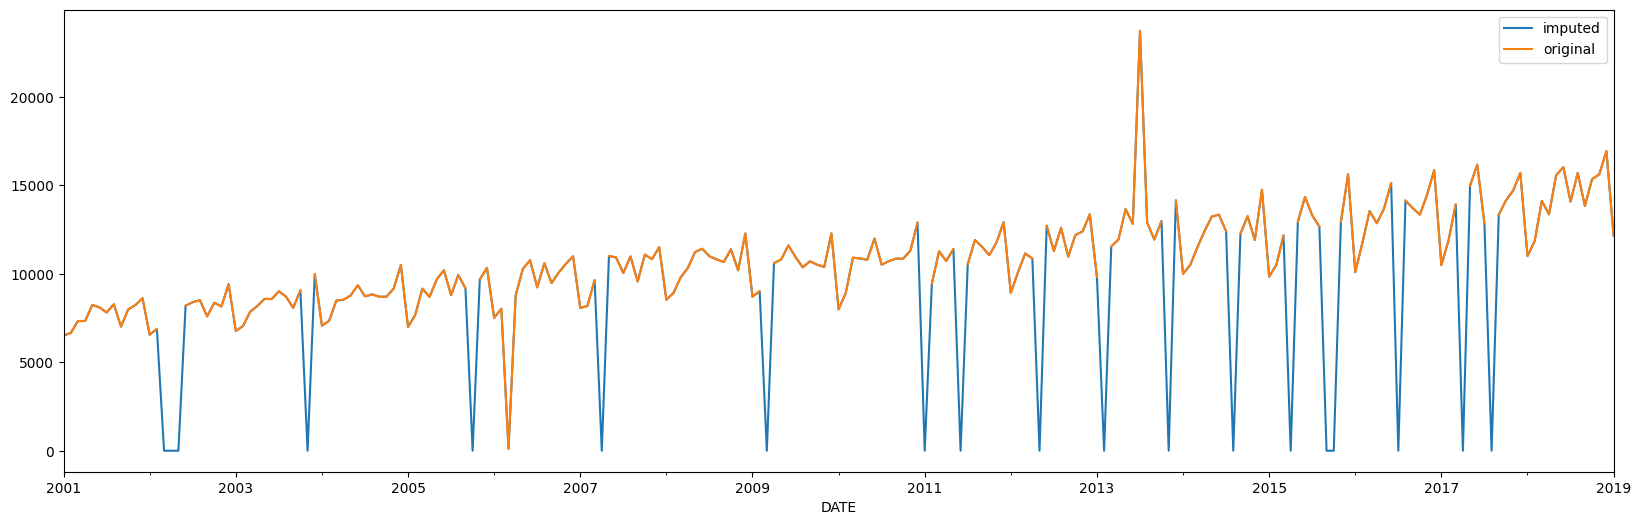

In [85]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

### Interpolation

So, We can't replace with 0 also.

> **Q. Is there a better way to fill NaNs?**

Taking an average for the entire signal didn't work.

Lets try something else.

How about we take the **average of the first point before and first point after** the missing value and fill the missing value with this average.

- This makes sense, as this way, we would still be taking average, but instead of taking it for the entire signal, we take average for the specific gap in data.
- This will ensure that we're not under or over estimating the values.
- As the average value would be **unique** to each gap in signal.

For example,
- if we're missing data for February 2005,
- we can assume that the sales in that month would be an average of sales in January 2005 and March 2005.

![picture](https://drive.google.com/uc?export=view&id=1Lk-Km2n9Usx_V9ikYrlnVv0aqHDs8Meq)


This is called **Linear Interpolation**.

Let's apply this now.

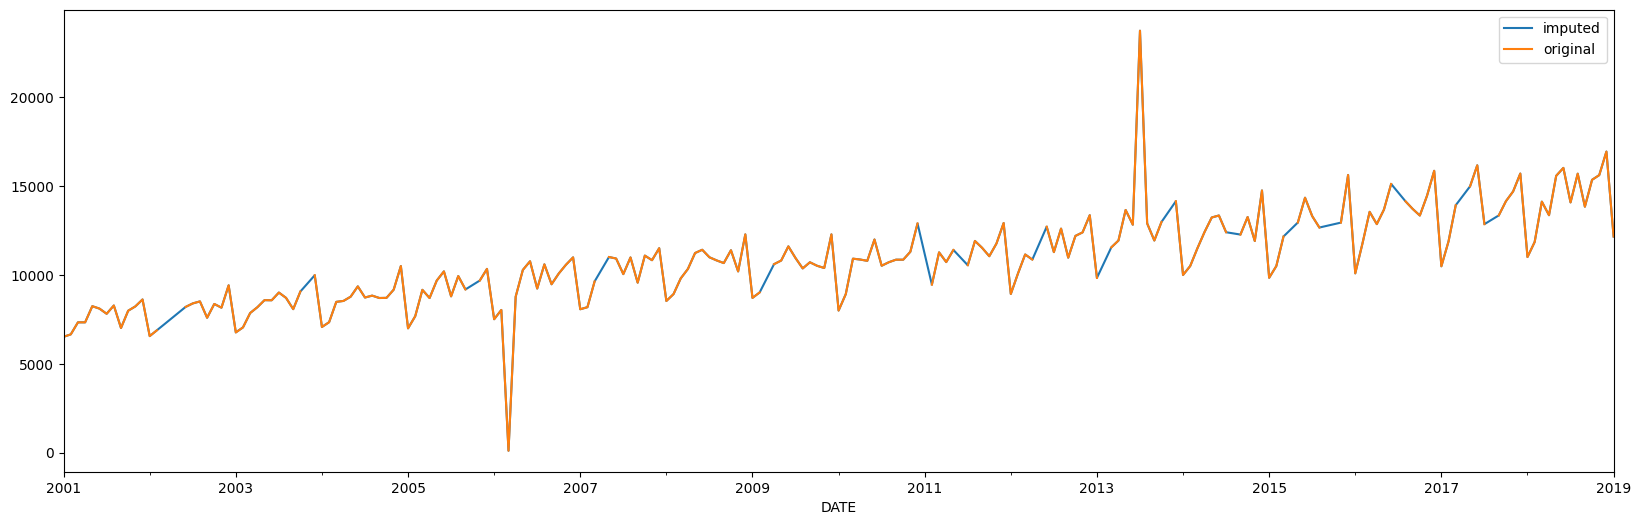

In [86]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()


This looks better than the previous plot.

The imputed values don't seem to be forced.

We're essentially joining the first point before and first point after the missing values with a **straight line** in the plot.

**Other types of interpolations**

Besides linear, there exist other types of interpolation, some of them are:-
- `pad`: Fill in NaN using existing values
- `polynomial`: You need to specify an **order**

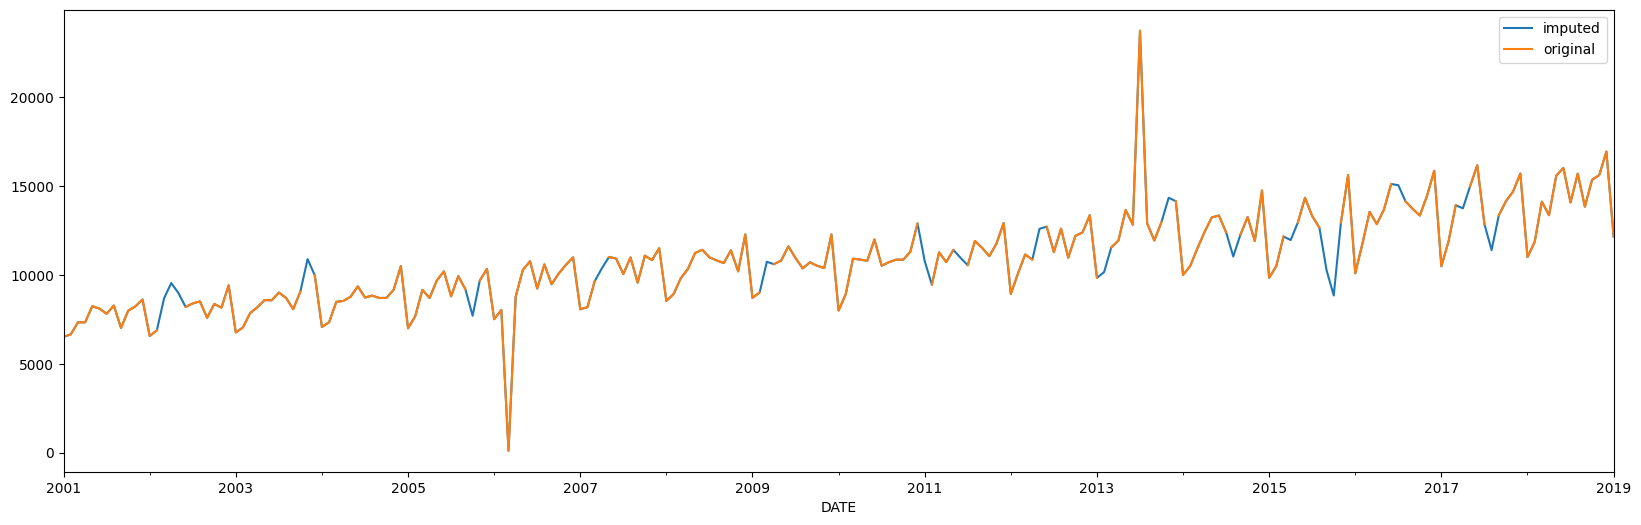

In [98]:
mobile_sales.Sales.interpolate(method='polynomial',order=5).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()


In [73]:
# Let's save this interpolated signal

mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

> **Q. What if we expand this idea and take average value of n points before and n points after the missing value?**

This is the foundation of the idea of **Centered moving average**, we will look at this shortly.

In fact, interpolation could be called as centered moving average with a window size = 1. This will make more sense in a bit, when we study CMA.

![picture](https://drive.google.com/uc?export=view&id=1kp5Dr56RJgQbi9rAffcXN02K-oYZhsBI)


---

## Challenge 2: Anomalies

Lets look at the other issue in our data

> **Q. What is an anomaly in context to time series?**

Anomaly/outlier is an **abnormal or unsual data point** in the data set, which stands out of the data.

It can simply be seen as a **wrong entry** in the data, and that can happen at times.

Alternatively, it could be the correct entry but for a **one time event**, which is  not likely to repeat in future.

If it's a one time event, it's not going to repeat in the future, or at least, we cannot predict it getting repeated in the future.

So, even if it's a valid data, we would like to remove it from our training set, because we don't want our model to get biased by that one time event that is not going to happen again.

<br>

> **Q. What are the anomalies in our dataset?**

1. In Feb 2006 of our time series, we see a drastic dip.
 - There was probably no data for that month,
 - So owing to a different data engineering process, it got filled by 0
 - Giving us an anomaly.

2. Similarly, in mid 2013, we see an abnormal spike.
 - Even if this is correct data for that period, we want to remove it.
 - That is another anomaly in our data.




> **INTERACTION**
- Now that we've estalished that we have anomalies in our series, how can we remove them?
### Replacing with NaN

> **Q. What if we replace the points of anomaly with NaN?**

This does not work very well.

If we replace sales value by NaN, then for that date, we would not have any data. The model would not know what happened that month.

<br>

> **Q. Why is not having data for specific entries a problem?**

Most of our forecasting methods, as you'll see, rely on the time steps being equally spaced.

If we have a missing time step, the formula would still work, but we'd get an incorrect answer.

<br>


### Lets visualise our data to identify the outliers

One of the best way to identify the anomalies are by plotting **Histogram**

Let's plot one for our dataset

[]

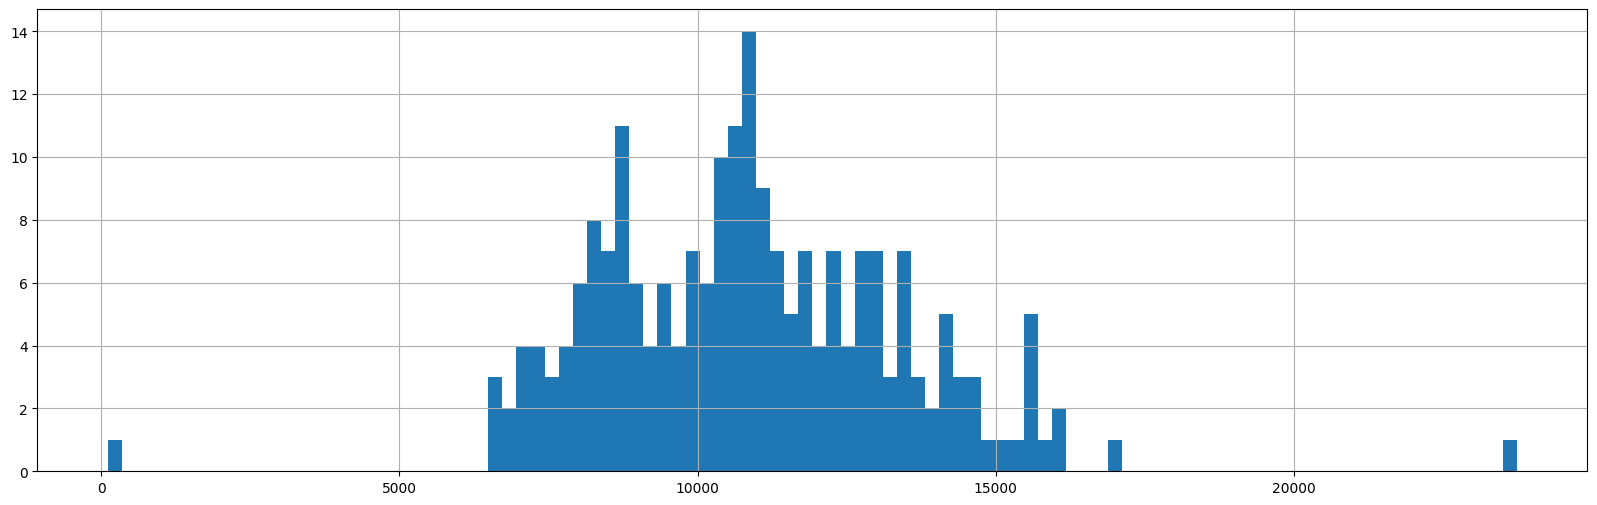

In [74]:
mobile_sales.Sales.hist(bins=100).plot()

From the plot, we can clearly see the anomalies.

We can easily decide where to cut the data, in order to get rid of anomalies.
* For instance, We can replace all the $values < 5000$ by 5000 and all the $values > 20,000$ by 20,000

<br>

> **Q. But what would we do if this histogram plot was more continuous?**

Then we would not know where to cut the data.

<br>


### Using Quantiles
> **Q. What if we use the concept of quantiles to help deal with anomalies?**

This seems promising. Lets see how we'll go about it.

First lets describe the data to see the quantiles.

In [75]:
mobile_sales.Sales.describe()

count      217.000000
mean     10873.046083
std       2571.620954
min        108.000000
25%       8923.000000
50%      10793.000000
75%      12555.500000
max      23740.000000
Name: Sales, dtype: float64

It makes sense to look at these values, as these are the most occuring values in the data.

> **Q. How do we determine anomalies using concept of percentile?**
Generally, we rule out an observation as an anomaly, if it is greater than 95 percentile, or less than 5 percentile.

![picture](https://drive.google.com/uc?export=view&id=11B3D9GEZUURHFr6YXY8uXB8f0l_3jnyy)

Let's find out these values.


In [76]:
mobile_sales.Sales.quantile(0.95)

15164.599999999997

This means that 95% of the values in our signal are less than 15,164.6, or that only 5% values are higher than this value.

Similarly, lets find the value for 5 percentile

In [77]:
mobile_sales.Sales.quantile(0.05)

7307.8

This means that only 5% of the values in our signal are less than 7307.8, or that about 95% values are higher than this value.

Using these values, we can cap them as the maximum and the minimum values of our series, respectively.

One way to do that using the `loc` method, as we have been doing till now.

Alternatively, we can utilise the `clip()` method in pandas. We need to assign values to parameters **upper** and **lower** to specify where to clip.

Lets look at a plot for the same as well.

<Axes: xlabel='DATE'>

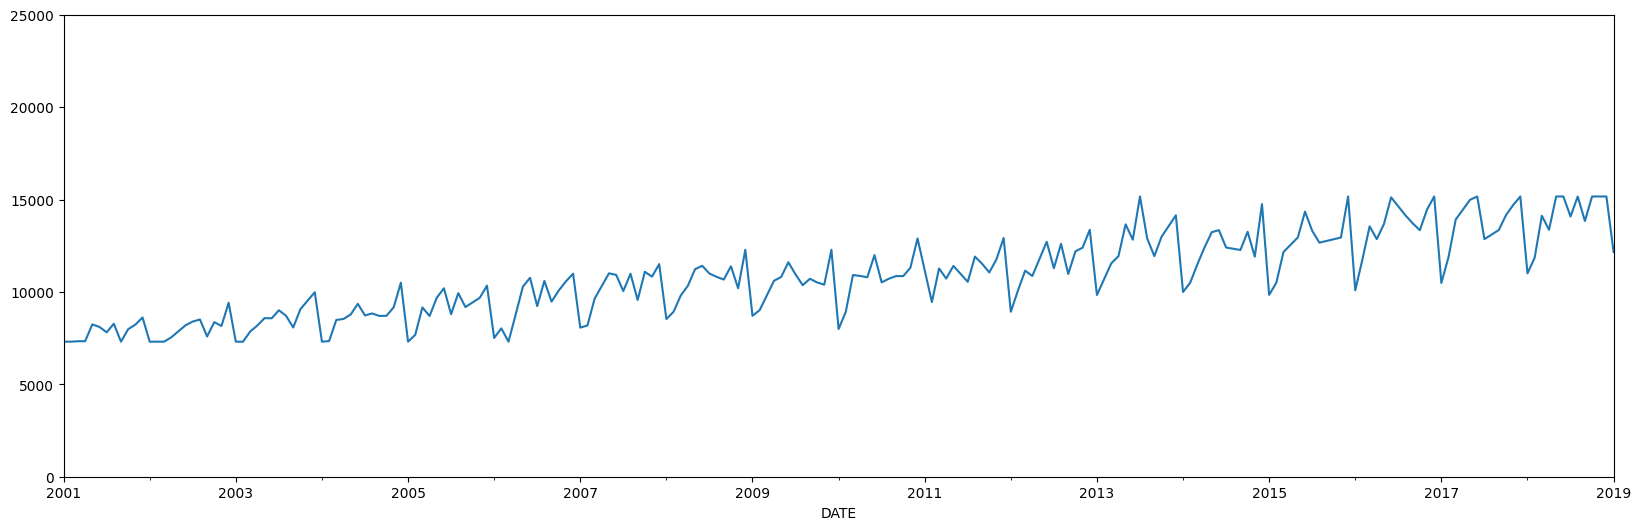

In [79]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot(ylim=(0,25000))

Notice that the scale for plot has changed now that outliers have been removed.

But as you can see in the beginning as well as in the end, some important values are also getting clipped.

> **Q. How do we solve the problem of useful data getting clipped?**

Let's change the percentiles that we're clipping on. - [98, 2]


**NOTE:**
- Try to keep the quantiles symmetric, if there's no reason to keep them non-symmteric.
- This means that if you're updating the upper bound as we did here, then update the lower bound accordingly.

<Axes: xlabel='DATE'>

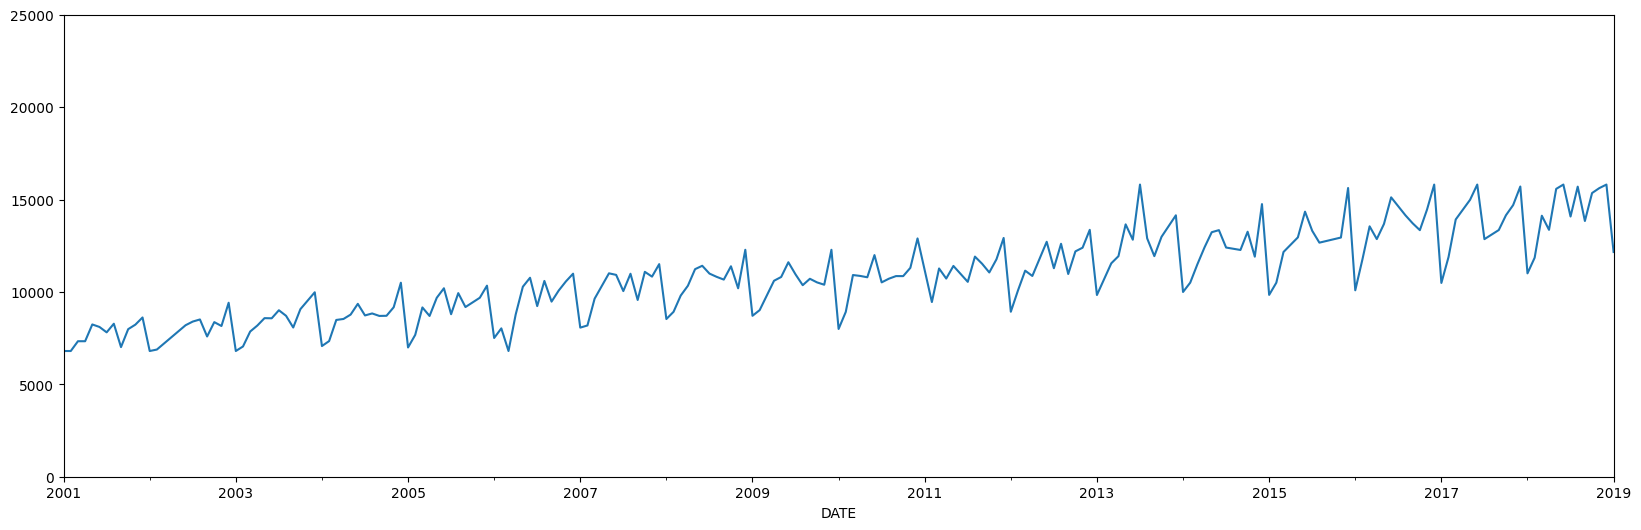

In [80]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02)).plot(ylim=(0,25000))

In [33]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))